<a href="https://colab.research.google.com/github/linetkatungwa/LINET-/blob/main/ASSIGNMENT_ONE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
#load dataset (Assume you have the' HateSpeech.csv' file)

data = pd.read_csv('HateSpeech.csv')
print(data.head())

   hate_speech  offensive_language  neither  Class  \
0            0                   0        3      0   
1            0                   0        3      0   
2            0                   0        3      0   
3            0                   0        3      0   
4            0                   0        3      0   

                                               Tweet  
0  ['The political elite are in desperation. Ordi...  
1  ["Am just curious the only people who are call...  
2  ['USERNAME_3 the area politicians are the one ...  
3  ['War expected in Nakuru if something is not d...  
4  ['USERNAME_4 tells kikuyus activists that they...  


In [ ]:
#summary statistics
print(data.describe())

       hate_speech  offensive_language      neither   Class
count       9692.0              9692.0  9692.000000  9692.0
mean           0.0                 0.0     3.016921     0.0
std            0.0                 0.0     0.135992     0.0
min            0.0                 0.0     3.000000     0.0
25%            0.0                 0.0     3.000000     0.0
50%            0.0                 0.0     3.000000     0.0
75%            0.0                 0.0     3.000000     0.0
max            0.0                 0.0     5.000000     0.0


In [ ]:
#fil missing valued in 'class' with the median
data['Class'].fillna(data['Class'].median(), inplace=True)

In [ ]:
#fill missing values in 'neither' with the most frequent value
data['neither'].fillna(data['neither'].mode()[0], inplace=True)

In [ ]:
#drop rows with missing target values
data.dropna(subset=['offensive_language'], inplace=True)

In [ ]:
from sklearn.preprocessing import StandardScaler

#define the numerical columns to scale
numerical_cols =['Class', 'neither']

#initialize scaler
scaler = StandardScaler()

#scale numerical features
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

In [ ]:
#one hot encode categorical columns
data = pd.get_dummies(data, columns=['hate_speech', 'offensive_language'],drop_first= True )

In [ ]:
print(data.head())

    neither  Class                                              Tweet
0 -0.124434    0.0  ['The political elite are in desperation. Ordi...
1 -0.124434    0.0  ["Am just curious the only people who are call...
2 -0.124434    0.0  ['USERNAME_3 the area politicians are the one ...
3 -0.124434    0.0  ['War expected in Nakuru if something is not d...
4 -0.124434    0.0  ['USERNAME_4 tells kikuyus activists that they...


In [ ]:
X  = data.drop('Class', axis=1)
y = data['Class']

from sklearn.model_selection import train_test_split

#split the data into training and testing test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Training set size: {X_test.shape}")

Training set size: (7753, 2)
Training set size: (1939, 2)


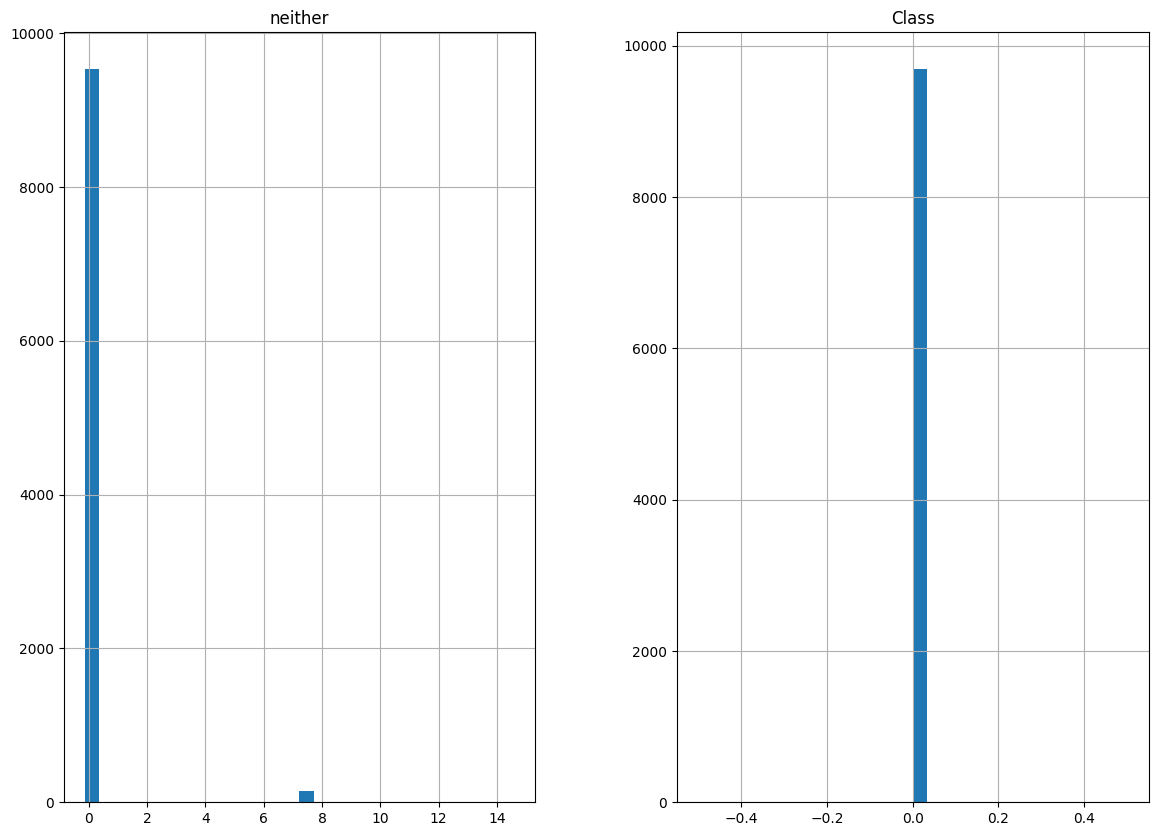

In [24]:
#histogram for numerical features

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data.hist(figsize=(14,10), bins=30,)
#call suptitle from te pyplot module
plt.show()






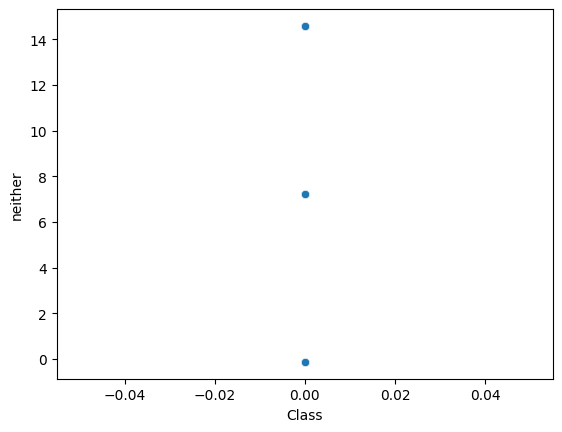

In [26]:
#scatter plot between two numerical features
sns.scatterplot(data,x='Class', y='neither')
plt.show()

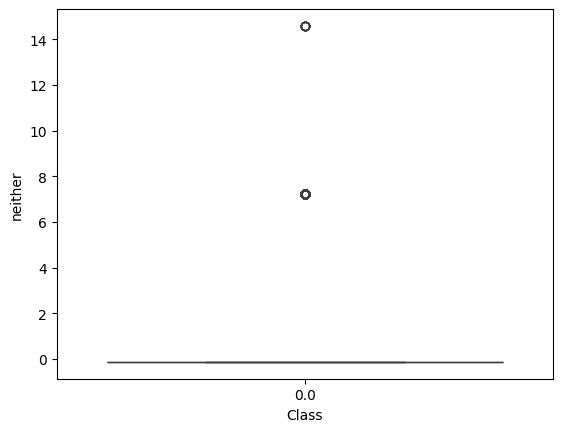

In [29]:
#boxplot
sns.boxplot(data, x='Class', y='neither')
plt.show()

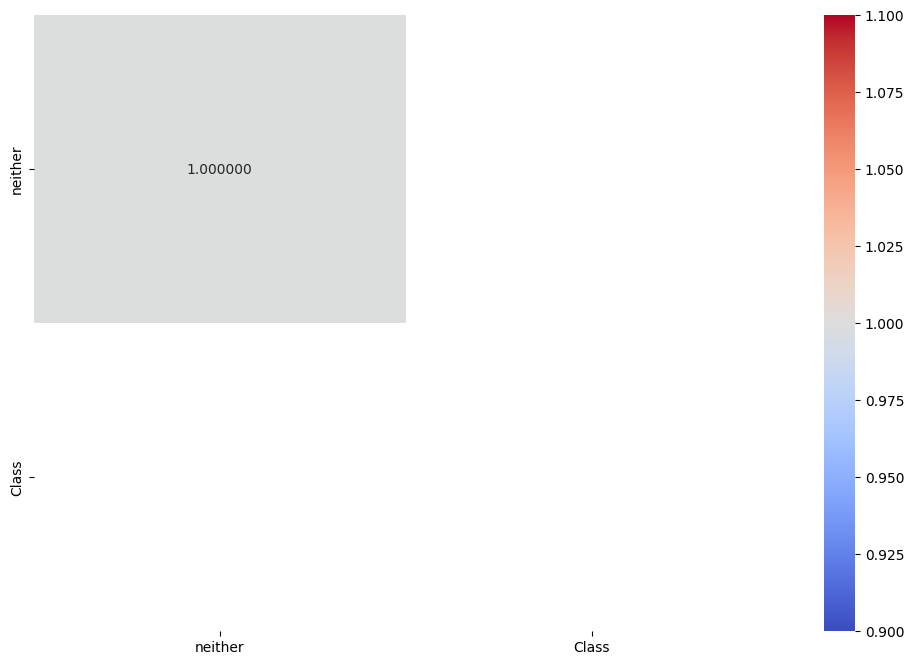

In [32]:
#correlation
correlation_matrix =data.corr(numeric_only =True)
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='2f')
plt.show()

Insights from EDA
1.**data quality**
-The dataset contains 'Class' missing values which were handled by dropping rows
2.**Distributions**
-Histograms show the distribution of numerical features.For instance,'neither ' has a normal distribution as well as'Class '  is skewed.
3.**relationships**
-the scatter plot between 'Class ' and 'neither ' shows a positive correlation.
-the box plot reveals that 'Class '  varies significantly across different categories of ' neither column'.
4**.correlation**
-the correlation heatmap shows that 'neither' and' 'have a strong positive correlatio
